Trained model: y = 1.00x + 0.69


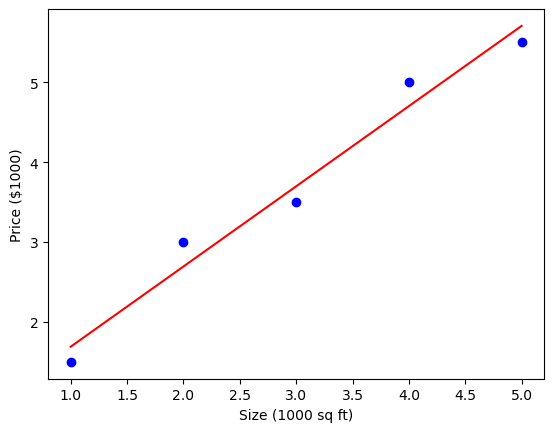

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (Size in 1000 sq ft, Price in $1000)
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
Y = np.array([1.5, 3.0, 3.5, 5.0, 5.5])

# Parameters initialization
m = 0  # slope
b = 0  # intercept
L = 0.01  # learning rate
epochs = 1000

n = float(len(X))

# Gradient Descent algorithm
for i in range(epochs):
    Y_pred = m * X + b
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # derivative wrt m
    D_b = (-2/n) * sum(Y - Y_pred)        # derivative wrt b
    m = m - L * D_m
    b = b - L * D_b

print(f"Trained model: y = {m:.2f}x + {b:.2f}")

# Plotting
plt.scatter(X, Y, color='blue')
plt.plot(X, m*X + b, color='red')
plt.xlabel('Size (1000 sq ft)')
plt.ylabel('Price ($1000)')
plt.show()

Trained Logistic Regression Model: weight = 1.70, bias = -5.69


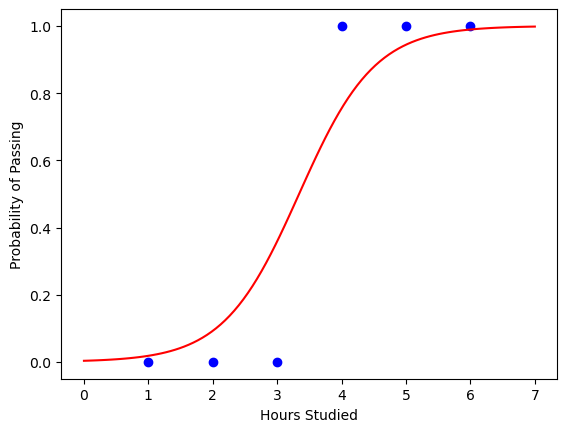

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Training data (Hours studied, Passed(1)/Failed(0))
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([0, 0, 0, 1, 1, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

m = 0  # weight
b = 0  # bias
L = 0.1  # learning rate
epochs = 1000
n = len(X)

for i in range(epochs):
    Z = m * X + b
    Y_pred = sigmoid(Z)
    
    # Gradient calculation
    D_m = (1/n) * sum((Y_pred - Y) * X)
    D_b = (1/n) * sum(Y_pred - Y)
    
    # Update parameters
    m = m - L * D_m
    b = b - L * D_b

print(f"Trained Logistic Regression Model: weight = {m:.2f}, bias = {b:.2f}")

# Plot data points and decision boundary
plt.scatter(X, Y, color='blue')

x_values = np.linspace(0, 7, 100)
y_values = sigmoid(m * x_values + b)
plt.plot(x_values, y_values, color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample data
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0]).reshape(-1, 1)
Y = np.array([1.5, 3.0, 3.5, 5.0, 5.5])

# Create and train model
model = LinearRegression()
model.fit(X, Y)

# Parameters
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict example
print("Prediction for 6.0:", model.predict([[6.0]])[0])

Coefficient (slope): 1.00
Intercept: 0.70
Prediction for 6.0: 6.700000000000001


In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sample data
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
Y = np.array([0, 0, 0, 1, 1, 1])

# Create and train model
model = LogisticRegression()
model.fit(X, Y)

# Predict probability
print("Probability of passing if studying 4 hours:", model.predict_proba([[4]])[0][1])
print("Prediction (pass/fail) for 4 hours:", model.predict([[4]])[0])

Probability of passing if studying 4 hours: 0.6365629265347537
Prediction (pass/fail) for 4 hours: 1


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # labels

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Try predicting on a sample
sample = [[5.0, 3.5, 1.3, 0.3]]
predicted_class = iris.target_names[model.predict(sample)[0]]
print(f"Predicted class for sample {sample}: {predicted_class}")

Model Accuracy: 1.00
Predicted class for sample [[5.0, 3.5, 1.3, 0.3]]: setosa


In [6]:
import pandas as pd

# Use your actual file path
file_path = r"C:\Users\janim\Downloads\Compressed\archive\heart.csv"

# Load dataset
df = pd.read_csv(file_path)

# Show the first few rows
print("🔍 First 5 rows of the dataset:")
print(df.head())

# Check for missing values and data types
print("\n🧾 Dataset info:")
print(df.info())

# Basic statistics
print("\n📊 Summary statistics:")
print(df.describe())

# Count target classes
print("\n✅ Target class distribution (0 = No disease, 1 = Disease):")
print(df['HeartDisease'].value_counts())

🔍 First 5 rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

🧾 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ----

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset
data = df.copy()

# Encode categorical features using LabelEncoder
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Separate features (X) and target (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Feature scaling (important for models like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Data is ready for model training.")

✅ Data is ready for model training.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.85

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

📊 Confusion Matrix:
[[68  9]
 [19 88]]


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")

Decision Tree Accuracy: 0.79
Random Forest Accuracy: 0.90
KNN Accuracy: 0.85


In [10]:
import joblib

# Save the best model (Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

joblib.dump(best_model, "heart_disease_model.pkl")
print("✅ Model saved as 'heart_disease_model.pkl'")

✅ Model saved as 'heart_disease_model.pkl'


In [11]:
model = joblib.load("heart_disease_model.pkl")

In [12]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset again
df = pd.read_csv(r"C:\Users\janim\Downloads\Compressed\archive\heart.csv")

# Encode categorical variables (like before)
from sklearn.preprocessing import LabelEncoder

data = df.copy()

label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Extract features
X = data.drop('HeartDisease', axis=1)

# Fit the scaler on X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can save the scaler
import joblib
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl
